In [25]:
#pip install scikit-learn

In [26]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("Obesity_Dataset - Obesity_Dataset .csv")

In [4]:
df.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [1]:
# LEGENDAS
# Sex 1 - Male; 2 - Female
# Age in years
# Height in cm
# Overweight_Obese_Family 1 - Yes; 2 - No
# Consumption_of_Fast_Food 1 - Yes; 2 - No
# Frequency_of_Consuming_Vegetables 1 - Rarely; 2 - Sometimes; 3 - Always
# Number_of_Main_Meals_Daily - 1; 2; 3; 3+
# Food_Intake_Between_Meals 1 - Rarely; 2 - Sometimes; 3 - Always
# Smoking 1 - Yes; 2 - No
# Liquid_Intake_Daily 1 - Amount smaller than 1 liter; 2 - Within the range of 1 - 2 liter; 3 - In excess of 2 liter
# Calculation_of_Calorie_Intake 1 - Yes; 2 - No
# Physical_Exercise 1 - No physical activity; 2 - In the range of 1-2 days; 3 - In the range of 3-4 days; 4 - In the range of 5-6 days; 5 - 6+ days
# Scheduele_Dedicated_to_Technology 1 - Between 0 and 2 hours; 2 - Between 3 and 5 hours; 3 - Exceeding five hours
# Type_of_Transportation 1 - Automobile; 2 - Motorbike; 3 - Bike; 4 - Public transportation; 5 - Walking
# Class 1 - Underweight; 2 - Normal; 3 - Overweight; 4 - Obesity

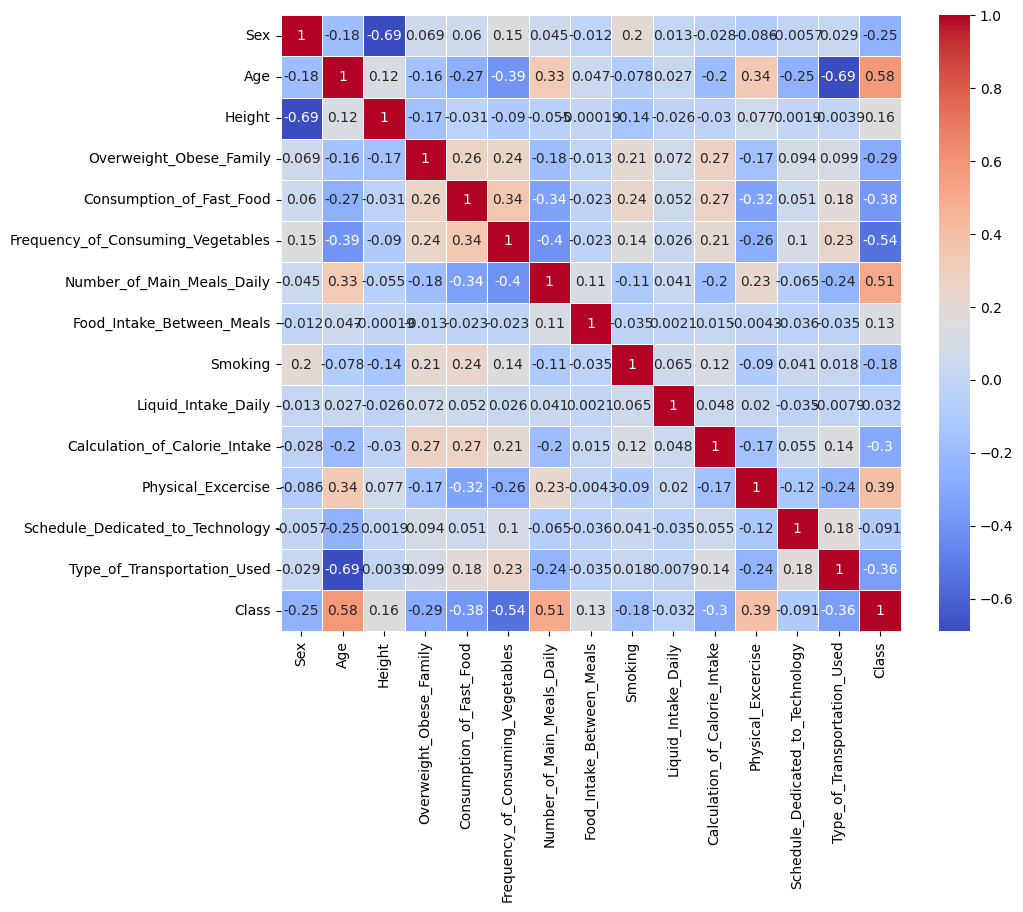

In [6]:
# Matriz de correlação
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

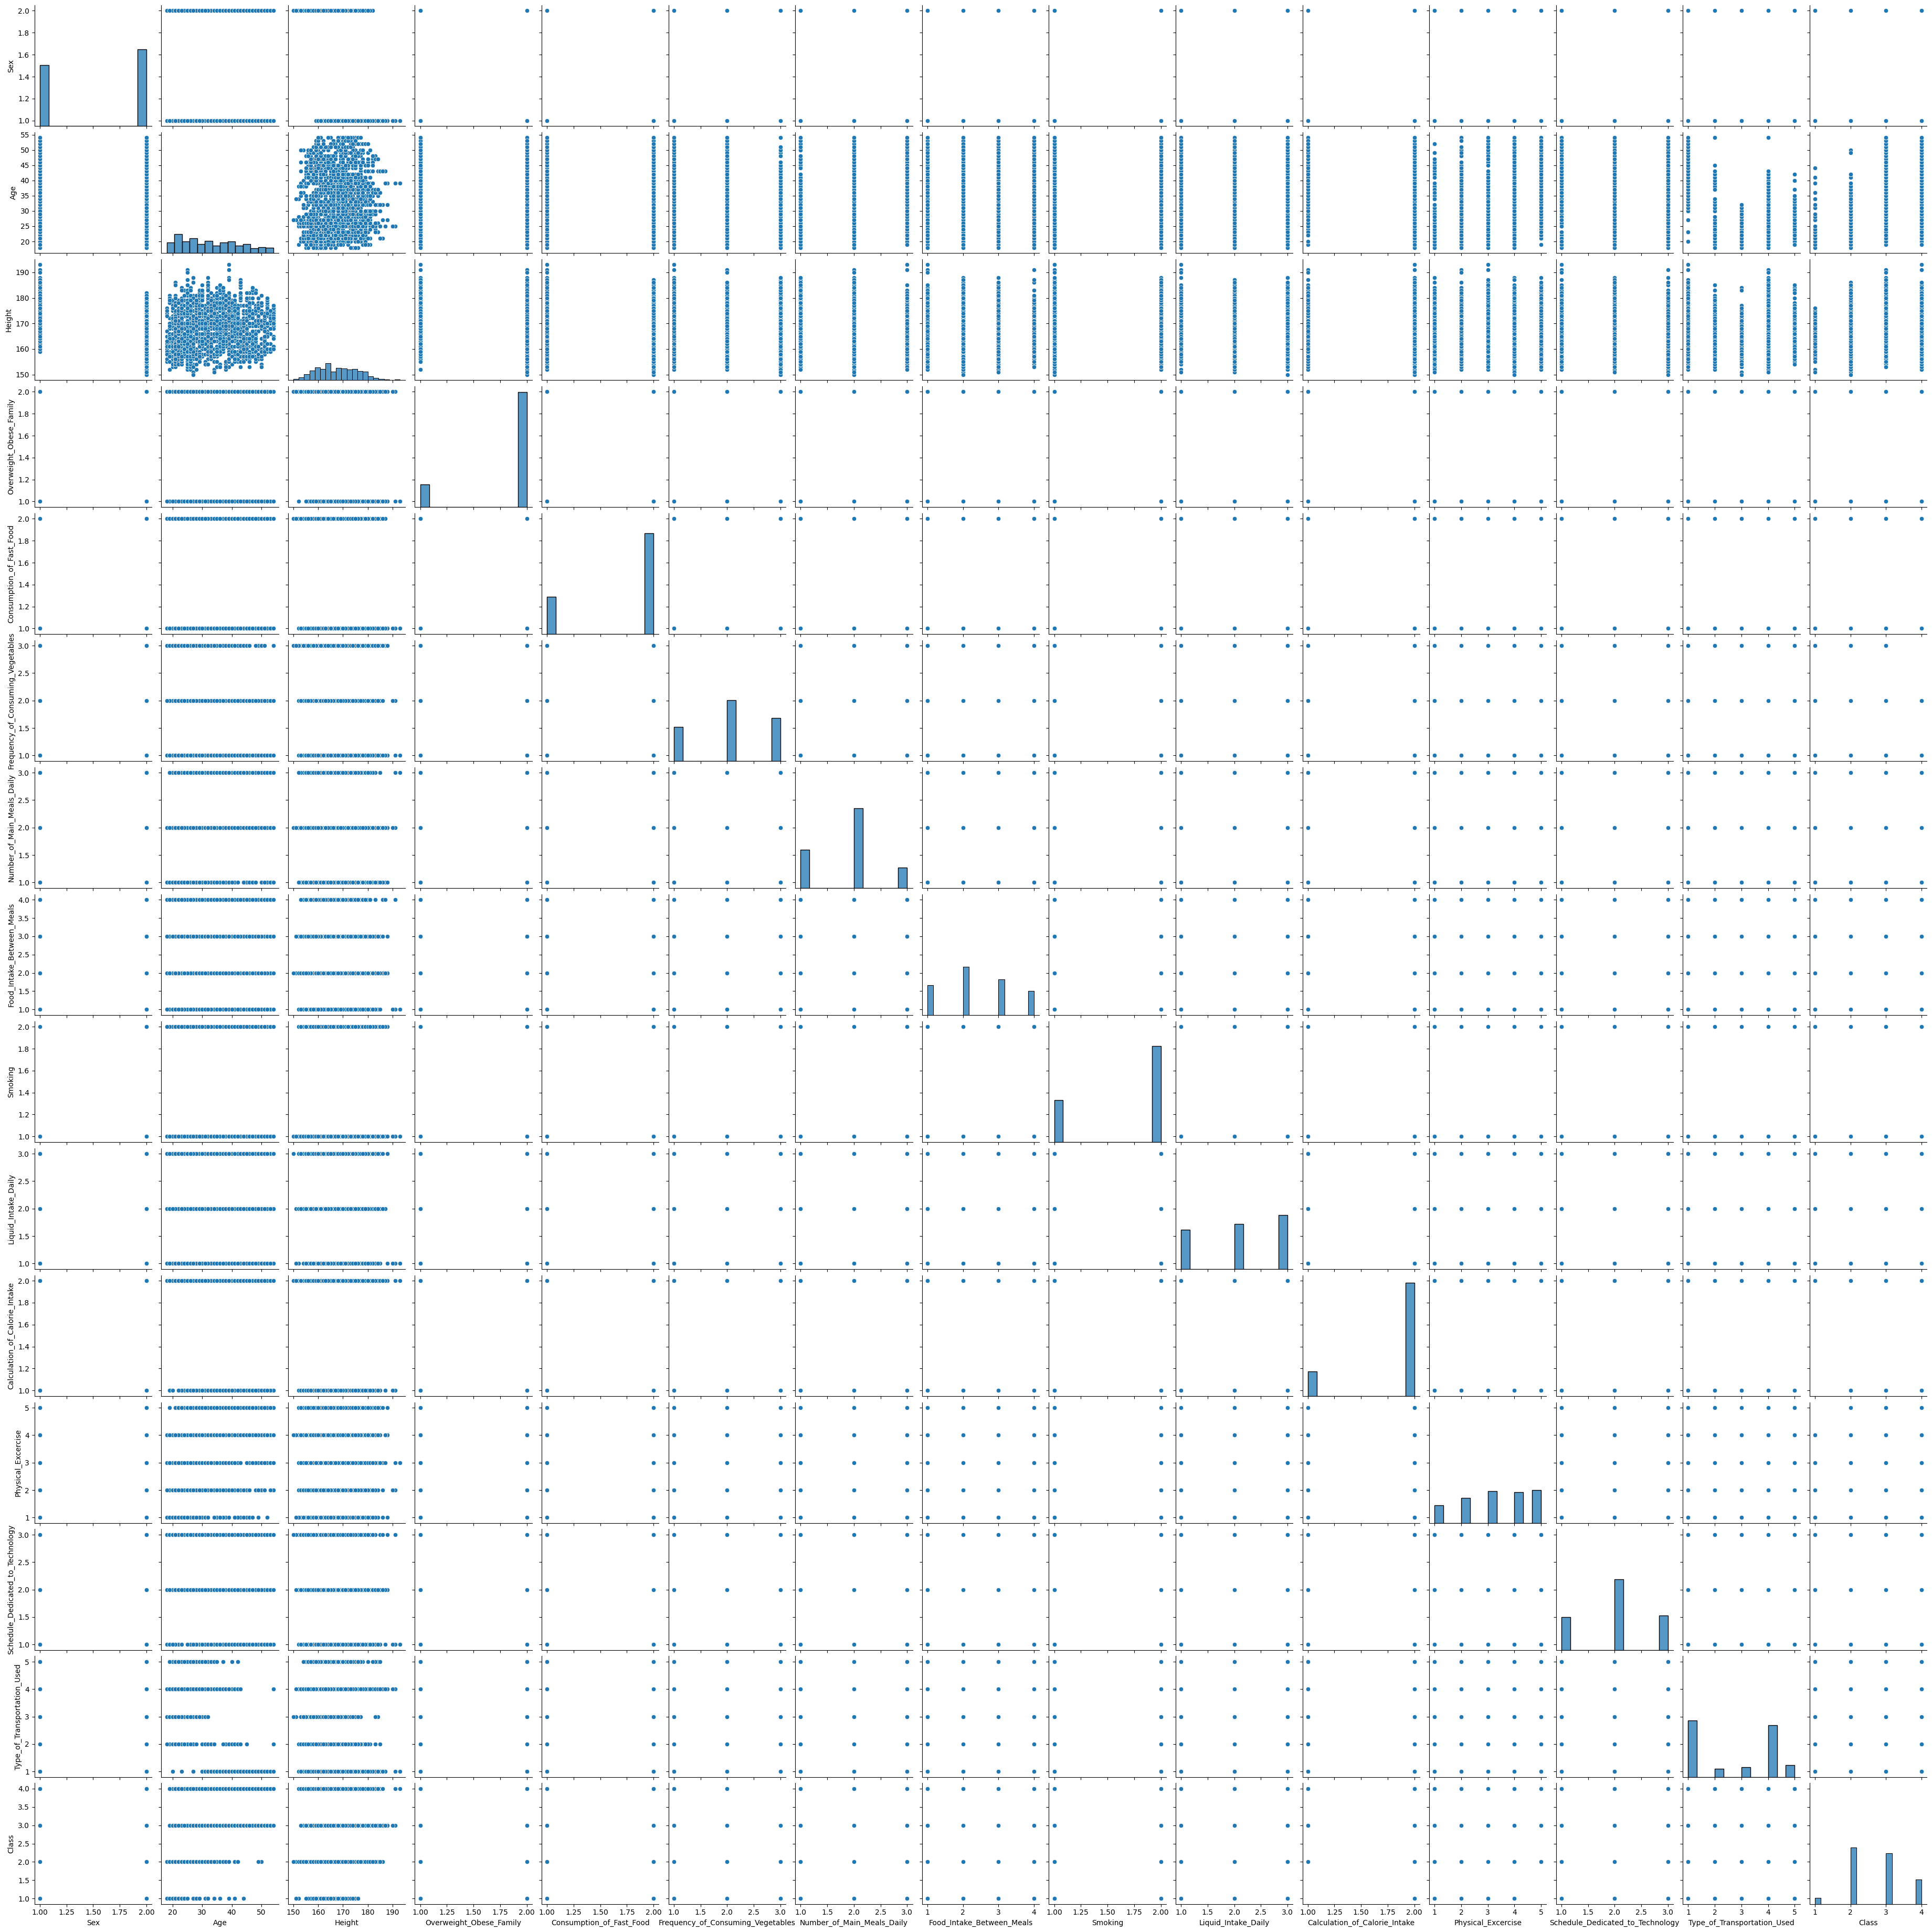

In [7]:
# Pair plot
sns.pairplot(df)
plt.show()

In [18]:
# Step 2: Prepare features (X) and target (y)
X = df.drop(columns=['Class'])  # Features (drop the 'class' column)
y = df['Class']  # Target (whether a person is overweight or not)

# Step 3: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose a model - Here we'll use Random Forest Classifier
model = RandomForestClassifier()

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.88      0.91      0.90       125
           3       0.84      0.81      0.82       131
           4       0.80      0.83      0.81        53

    accuracy                           0.86       322
   macro avg       0.88      0.87      0.87       322
weighted avg       0.86      0.86      0.86       322



In [19]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                              Feature  Importance
1                                 Age    0.236546
2                              Height    0.110422
5   Frequency_of_Consuming_Vegetables    0.093170
6          Number_of_Main_Meals_Daily    0.083640
13        Type_of_Transportation_Used    0.081304
11                 Physical_Excercise    0.074306
7           Food_Intake_Between_Meals    0.057541
9                 Liquid_Intake_Daily    0.049186
8                             Smoking    0.045146
0                                 Sex    0.044893
12   Schedule_Dedicated_to_Technology    0.038781
4            Consumption_of_Fast_Food    0.034597
3             Overweight_Obese_Family    0.028727
10      Calculation_of_Calorie_Intake    0.021739


In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
scaler = StandardScaler()  # Initialize the scaler

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.6925

Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.46      0.52        13
           2       0.78      0.81      0.79       125
           3       0.67      0.66      0.67       131
           4       0.55      0.55      0.55        53

    accuracy                           0.69       322
   macro avg       0.65      0.62      0.63       322
weighted avg       0.69      0.69      0.69       322



In [11]:
# Usando SMOTE para criar mais registros de Underweight

In [16]:
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_scaled)
print("Random Forest with SMOTE Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest with SMOTE Accuracy: 0.8385093167701864

Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.92      0.89        13
           2       0.89      0.88      0.89       125
           3       0.83      0.79      0.81       131
           4       0.75      0.83      0.79        53

    accuracy                           0.84       322
   macro avg       0.83      0.86      0.84       322
weighted avg       0.84      0.84      0.84       322



In [12]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

knn.fit(X_train_resampled, y_train_resampled)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN with SMOTE Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KNN with SMOTE Accuracy: 0.6801

Classification Report:
               precision    recall  f1-score   support

           1       0.45      1.00      0.62        13
           2       0.80      0.70      0.74       125
           3       0.74      0.59      0.66       131
           4       0.53      0.79      0.63        53

    accuracy                           0.68       322
   macro avg       0.63      0.77      0.66       322
weighted avg       0.72      0.68      0.68       322

